In [1]:
from pybedtools import BedTool
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = (10, 6)

In [4]:
bam_dir = '../bam'

## Characteristics of the capture design

In [5]:
target_regions = BedTool('../input/target_regions.bed')
len(target_regions)

1251

### Total length of target regions

In [6]:
target_regions.total_coverage()

573657

### Size distribution of target regions (all numbers in bp)

In [7]:
lengths = pd.Series(i.length for i in target_regions)

In [8]:
lengths.describe()

count    1251.000000
mean      458.558753
std       474.844826
min        60.000000
25%       119.000000
50%       151.000000
75%       820.000000
max      3899.000000
dtype: float64

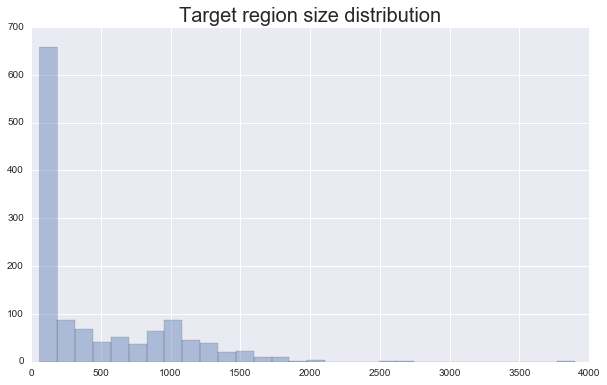

In [9]:
sns.distplot(lengths, kde=False)
plt.title('Target region size distribution', fontsize=20)

In [10]:
def analyze_coverage(bam_file, target_regions):
    bam = BedTool(bam_file)
    cov = target_regions.coverage(bam, d=True).to_dataframe()
    
    print(bam_file, '\n========================================')
    print('Number of bases in target regions covered:', len(cov.query('score > 0')))
    print('Fraction of target regions covered:', (cov.score > 0).mean() * 100, '%')
    print('\nSummary of coverage at sites in target regions:\n')
    print(cov.score.describe())
    
    sns.distplot(cov.score, kde=False)
    plt.title('Coverage distribution', fontsize=20)
    plt.tick_params(labelsize=15)
    plt.xlabel('coverage', fontsize=20)
    plt.xlim(0, cov.score.max())

# El Sidron 570kb capture

## Proportion of on-target reads

In [11]:
on = ! samtools view ../bam/sidron_ontarget.bam | wc -l
total = ! samtools view ../tmp/sidron_rmdup_len35mapq37_sorted.bam | wc -l

print('on-target read count: ', on[0])
print('total read count: ', total[0])
print(int(on[0]) / int(total[0]) * 100, '%')

on-target read count:  92352
total read count:  244170
37.822828357292046 %


../bam/sidron_ontarget.bam 
Number of bases in target regions covered: 549351
Fraction of target regions covered: 95.7629733447 %

Summary of coverage at sites in target regions:

count    573657.000000
mean          8.425742
std           5.475308
min           0.000000
25%           4.000000
50%           8.000000
75%          12.000000
max          53.000000
Name: score, dtype: float64


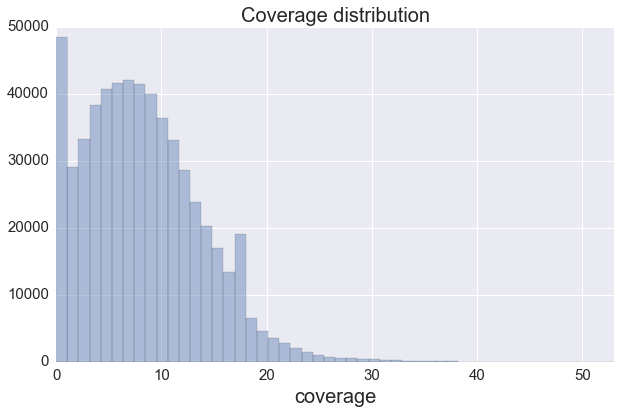

In [12]:
analyze_coverage('../bam/sidron_ontarget.bam', target_regions)

# Denisova 8 shotgun (all fragments)

In [13]:
read_count = ! samtools view ../bam/den8_ontarget.bam | wc -l
print('Number of reads: ', read_count[0])

Number of reads:  561


../bam/den8_ontarget.bam 
Number of bases in target regions covered: 22376
Fraction of target regions covered: 3.9005886793 %

Summary of coverage at sites in target regions:

count    573657.000000
mean          0.041147
std           0.209512
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: score, dtype: float64


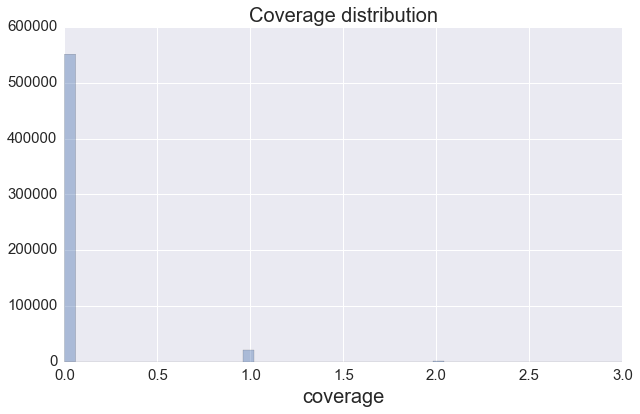

In [14]:
analyze_coverage('../bam/den8_ontarget.bam', target_regions)

# Denisova 8 shotgun (damaged fragments only)

In [15]:
read_count = ! samtools view ../bam/deam_den8_ontarget.bam | wc -l
print('Number of reads: ', read_count[0])

Number of reads:  102


../bam/deam_den8_ontarget.bam 
Number of bases in target regions covered: 4227
Fraction of target regions covered: 0.736851463505 %

Summary of coverage at sites in target regions:

count    573657.000000
mean          0.007369
std           0.085523
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: score, dtype: float64


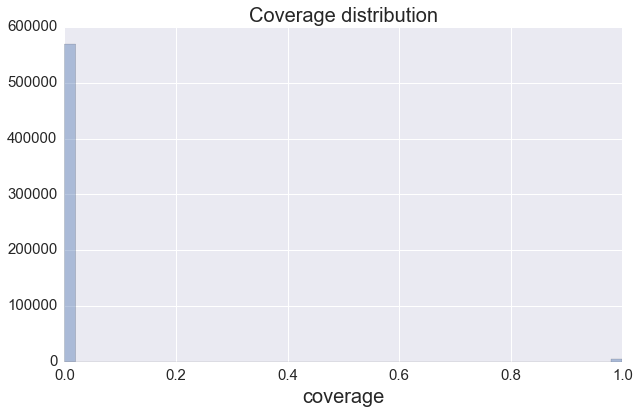

In [16]:
analyze_coverage('../bam/deam_den8_ontarget.bam', target_regions)

# Denisova 4 shotgun (all fragments)

In [17]:
read_count = ! samtools view ../bam/den4_ontarget.bam | wc -l
print('Number of reads: ', read_count[0])

Number of reads:  77


../bam/den4_ontarget.bam 
Number of bases in target regions covered: 4207
Fraction of target regions covered: 0.733365059609 %

Summary of coverage at sites in target regions:

count    573657.000000
mean          0.007470
std           0.087669
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: score, dtype: float64


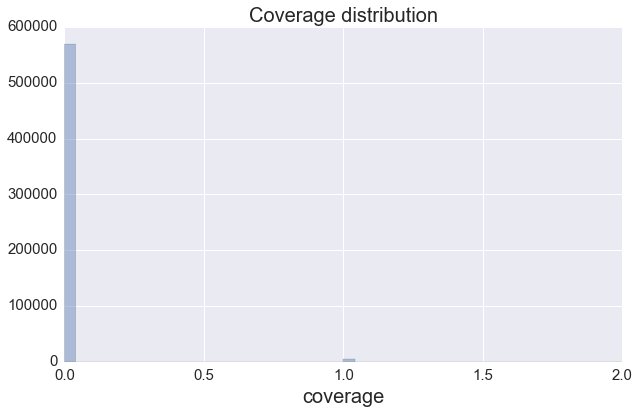

In [18]:
analyze_coverage('../bam/den4_ontarget.bam', target_regions)

# Denisova 4 shotgun (damaged fragments only)

In [19]:
read_count = ! samtools view ../bam/deam_den4_ontarget.bam | wc -l
print('Number of reads: ', read_count[0])

Number of reads:  3


../bam/deam_den4_ontarget.bam 
Number of bases in target regions covered: 156
Fraction of target regions covered: 0.027193950392 %

Summary of coverage at sites in target regions:

count    573657.000000
mean          0.000272
std           0.016488
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: score, dtype: float64


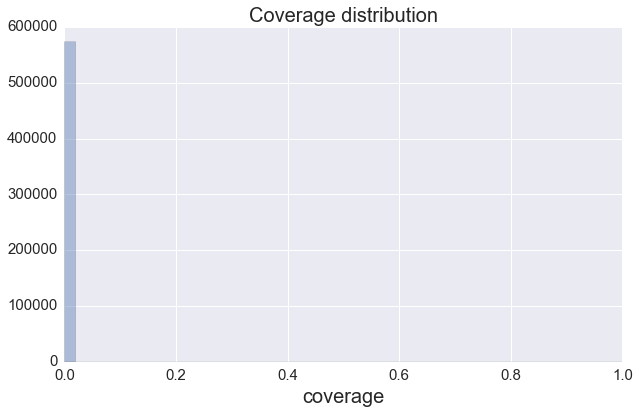

In [20]:
analyze_coverage('../bam/deam_den4_ontarget.bam', target_regions)

# El Sidron exome capture

../bam/exome_sidron_ontarget.bam 
Number of bases in target regions covered: 20746
Fraction of target regions covered: 3.61644676174 %

Summary of coverage at sites in target regions:

count    573657.000000
mean          0.215787
std           2.287567
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         158.000000
Name: score, dtype: float64


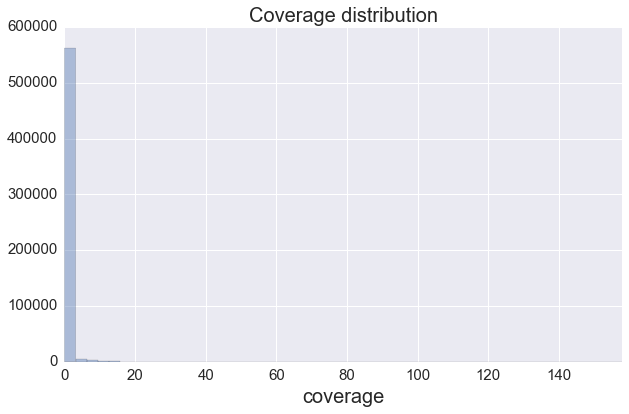

In [21]:
analyze_coverage('../bam/exome_sidron_ontarget.bam', target_regions)

# A00 Y chromosome data

../bam/a00_ontarget.bam 
Number of bases in target regions covered: 573656
Fraction of target regions covered: 99.9998256798 %

Summary of coverage at sites in target regions:

count    573657.000000
mean         21.815273
std           6.579486
min           0.000000
25%          17.000000
50%          21.000000
75%          26.000000
max         154.000000
Name: score, dtype: float64


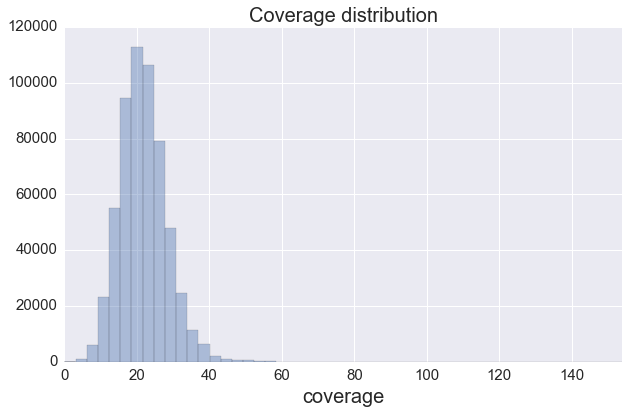

In [22]:
analyze_coverage('../bam/a00_ontarget.bam', target_regions)

<br><br><br><br><br><br><br><br><br><br>
# Y capture regions from the Lippold et al. 2014 paper

In [23]:
# load the data from the publisher's server
basti_targets = pd.read_excel('http://static-content.springer.com/esm/art%3A10.1186%2F2041-2223-5-13/MediaObjects/13323_2014_104_MOESM2_ESM.xlsx', skiprows=4)

# add a chromosome column to make a valid BED file
basti_targets['Chrom'] = 'Y'

# convert the dataframe to a BedTool object
basti_targets = BedTool.from_dataframe(basti_targets[['Chrom', 'Start', 'End']])

In [24]:
basti_targets.total_coverage()

501108

That is quite smaller than the target regions in BED file provided by Qiaomei.

### What is the intersect between the published regions and the one provided by Qiaomei?

In [25]:
target_regions.intersect(basti_targets).total_coverage()

501108

In [26]:
print(basti_targets.total_coverage() / target_regions.total_coverage() * 100, '%')

87.3532441859857 %


So, although it is the same design, the actual coordinates published by Lippold et al. are quite smaller.

## Alternative BED file

There also seems to be a BED file burried in Stoneking group's folder with a familiar name: `/mnt/genotyping/sendru/basti_design.bed`

Let's test this one:

In [27]:
basti_design = BedTool('/mnt/genotyping/sendru/basti_design.bed')
basti_design.total_coverage()

573657

In [28]:
len(basti_design)

1251

In [29]:
target_regions.intersect(basti_design).total_coverage()

573657

So this file is the same one as provided by Qiaomei.